### Diabetes Classification

A simple neural network to classify whether a person has diabetes or not. 

Create a virtual enviromnet and install the requirements.txt file using the `pip install -r requirements.txt`

This is a basic model without any evaluation. Although, you can split the training data into train and test and perform evaluation to 
get the overall accuracy and loss on the test data.

In [568]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [569]:
df = pd.read_csv("diabetes.csv")

In [570]:
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Class
0,6,148,72,35,0,33.6,50,positive
1,1,85,66,29,0,26.6,31,negative
2,8,183,64,0,0,23.3,32,positive
3,1,89,66,23,94,28.1,21,negative
4,0,137,40,35,168,43.1,33,positive


### Exploratory Data Analysis

In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Age                           768 non-null    int64  
 7   Class                         768 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 48.1+ KB


In [572]:
# Missing values
print("Missing values in the dataset")
df.isna().sum()

Missing values in the dataset


Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Age                             0
Class                           0
dtype: int64

In [573]:
# Duplicate values
print(f"There are {df.duplicated().sum()} duplicate values")

There are 0 duplicate values


In [574]:
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Class
0,6,148,72,35,0,33.6,50,positive
1,1,85,66,29,0,26.6,31,negative
2,8,183,64,0,0,23.3,32,positive
3,1,89,66,23,94,28.1,21,negative
4,0,137,40,35,168,43.1,33,positive


Text(0.5, 1.0, 'Distribution of Age')

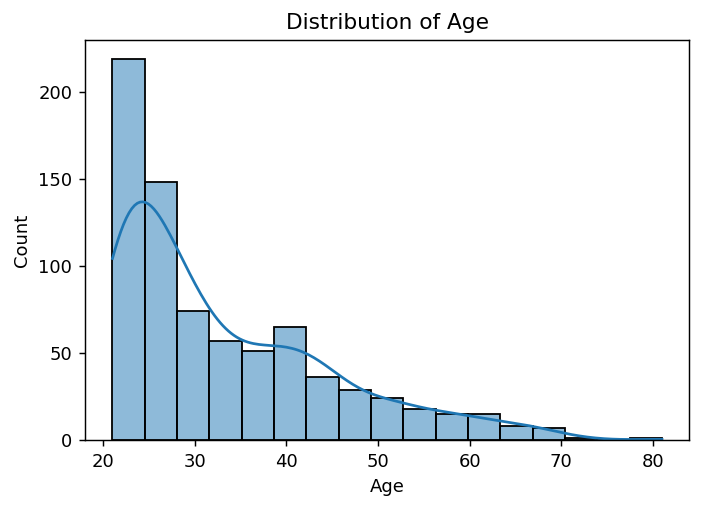

In [575]:
# Distribution of Age
plt.figure(figsize=(6,4), dpi=130)
sns.histplot(data=df, x="Age", kde=True)
plt.title("Distribution of Age")

Text(0, 0.5, 'Count')

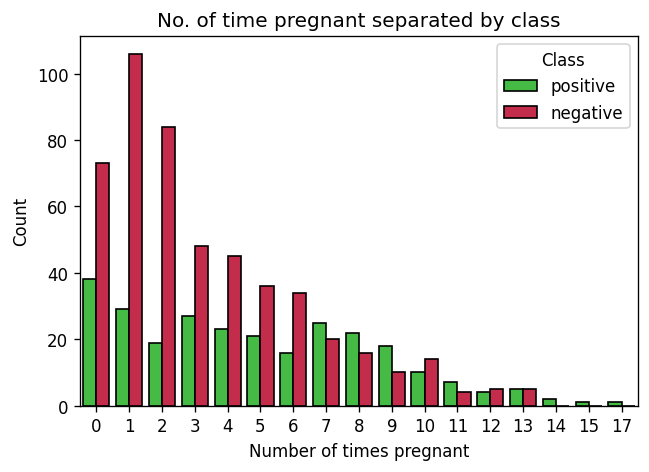

In [576]:
# No. of time pregnant count plot separated by class
clrs = ["#32CD32", "#DC143C"]
plt.figure(figsize=(6,4), dpi=120)
sns.countplot(data=df, x="Number of times pregnant", color="green", hue="Class", palette= sns.color_palette(clrs), edgecolor="black")
plt.title("No. of time pregnant separated by class")
plt.ylabel("Count")

Text(0.5, 1.0, 'Distribution of BMI')

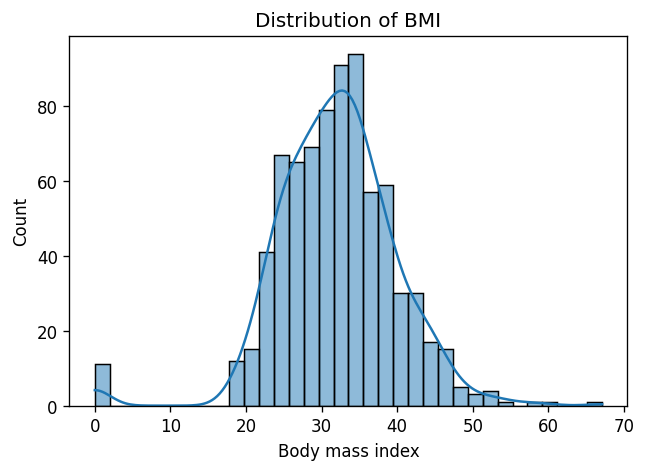

In [577]:
# Distribution of BMI 
plt.figure(figsize=(6,4), dpi=120)
sns.histplot(data=df, x="Body mass index", kde=True)
plt.title("Distribution of BMI")

c:\Personal\Data Science\Diabetes Classification\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 720x480 with 0 Axes>

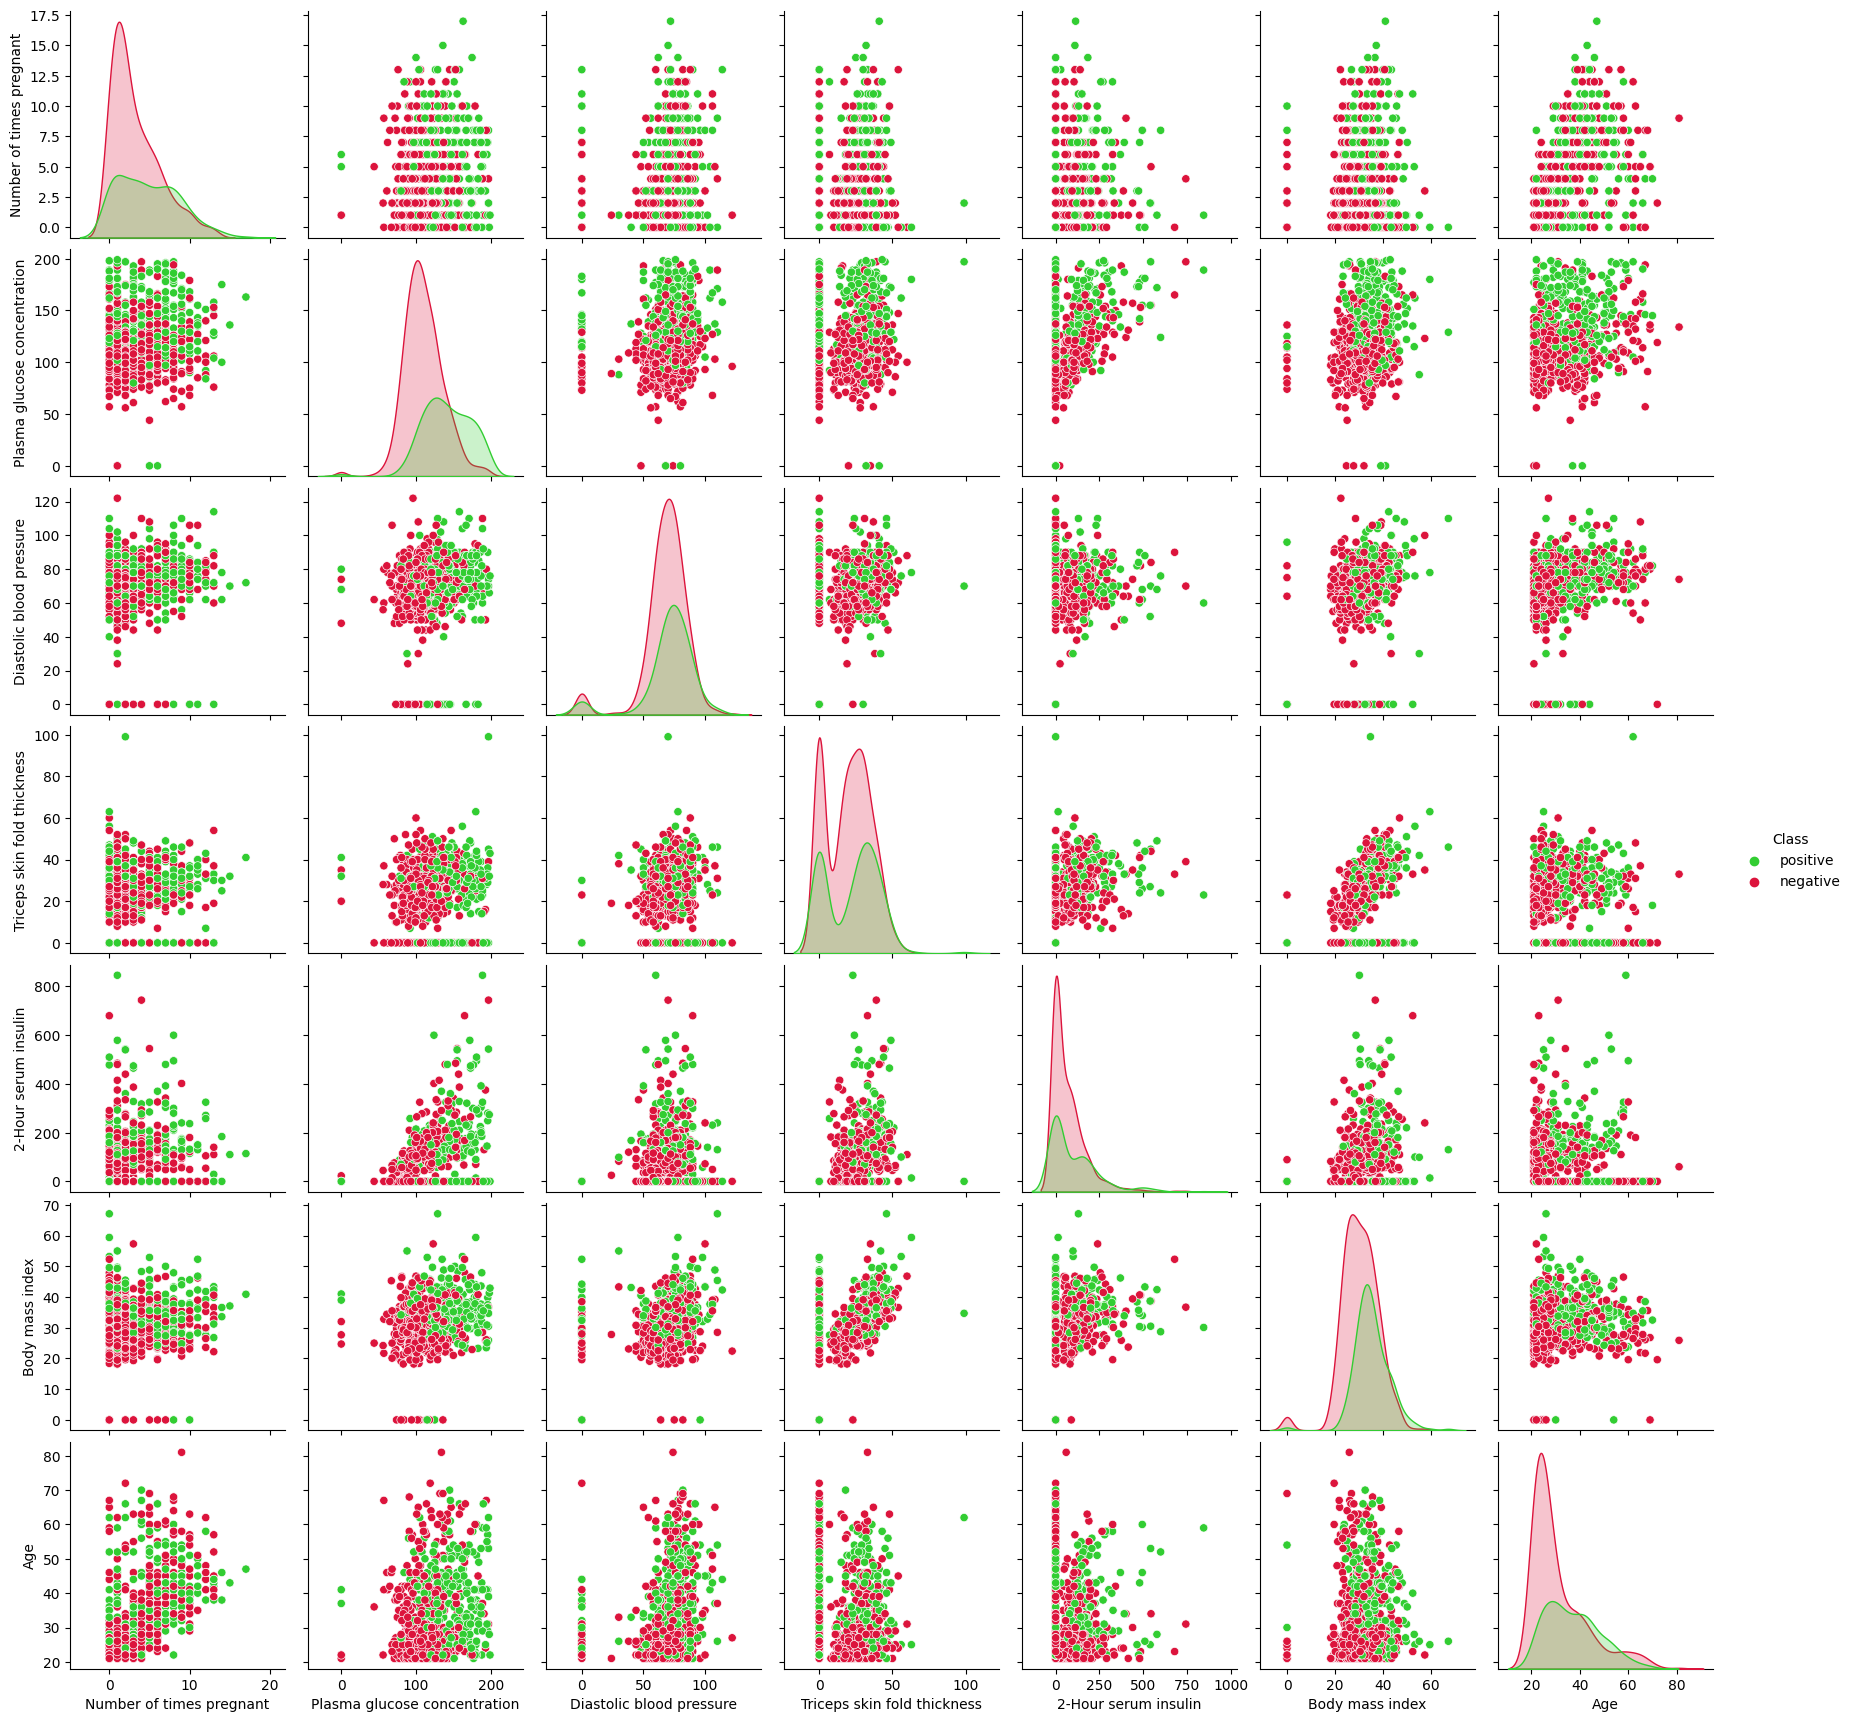

In [578]:
clrs = ["#32CD32", "#DC143C"]
plt.figure(figsize=(6,4), dpi=120)
sns.pairplot(data=df, hue="Class", palette=sns.color_palette(clrs))

In [579]:
# Convert the positive and negative classes to integers
df["Class"] = df["Class"].replace({"positive": 1, "negative": 0})

In [580]:
# Correlation matrix
corr_matrix = df.corr(method="spearman")
corr_matrix

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Class
Number of times pregnant,1.000000,0.130734,0.185127,-0.085222,-0.126723,0.000132,0.607216,0.198689
Plasma glucose concentration,0.130734,1.000000,0.235191,0.060022,0.213206,0.231141,0.285045,0.475776
Diastolic blood pressure,0.185127,0.235191,1.000000,0.126486,-0.006771,0.292870,0.350895,0.142921
Triceps skin fold thickness,-0.085222,0.060022,0.126486,1.000000,0.541000,0.443615,-0.066795,0.089728
2-Hour serum insulin,-0.126723,0.213206,-0.006771,0.541000,1.000000,0.192726,-0.114213,0.066472
Body mass index,0.000132,0.231141,0.292870,0.443615,0.192726,1.000000,0.131186,0.309707
Age,0.607216,0.285045,0.350895,-0.066795,-0.114213,0.131186,1.000000,0.309040
Class,0.198689,0.475776,0.142921,0.089728,0.066472,0.309707,0.309040,1.000000


Text(0.5, 1.0, 'Spearman Correlation Matrix')

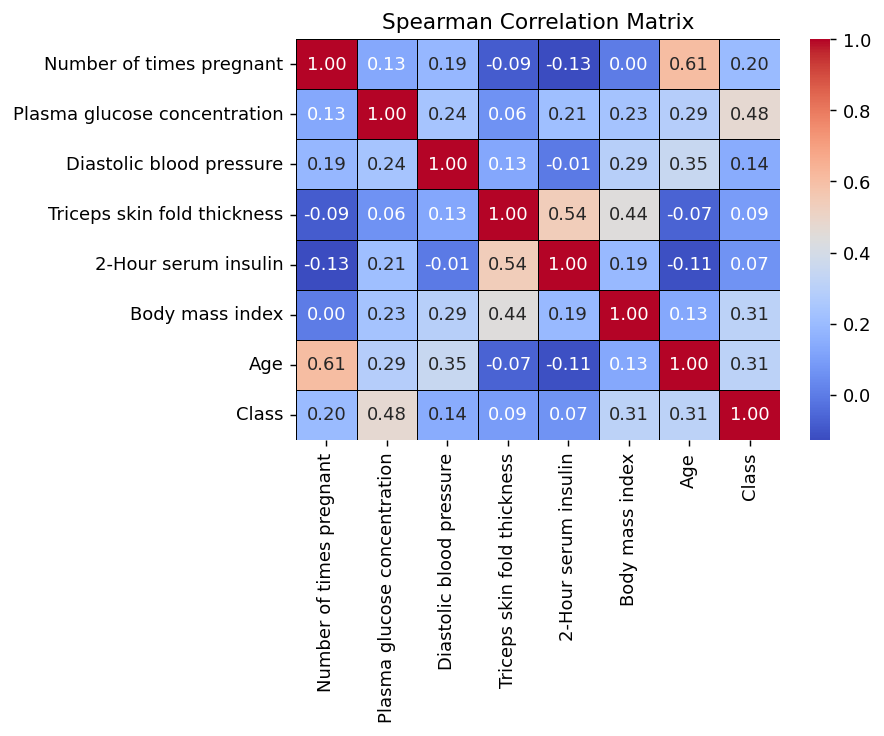

In [581]:
# Correlatino plot
plt.figure(figsize=(6,4), dpi=130)
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="black")
plt.title("Spearman Correlation Matrix")

### Building the Neural Network

In [582]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [583]:
X = np.array(X)
y = np.array(y, dtype=float)

In [584]:
# Standard Scalar - Convert the values between (-1, 1) [(x-mean)/std]
sc = StandardScaler()
X = sc.fit_transform(X) # <- Fit calculates the mean and std, and transform applies it

In [585]:
# Verify the transformation
X

array([[ 0.63994726,  0.84832379,  0.14964075, ..., -0.69289057,
         0.20401277,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.69289057,
        -0.68442195, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -0.69289057,
        -1.10325546, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ...,  0.27959377,
        -0.73518964, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.69289057,
        -0.24020459,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.69289057,
        -0.20212881, -0.87137393]])

In [586]:
# Convert to tensors
X = torch.tensor(X)
y = torch.tensor(y)

In [587]:
print(f"The shape of X is {X.shape}")
print(f"The shape of y is {y.shape}")

# We need to convert the shape of y from (768) i.e. 1 dimension to (768,1) to 2 dimension

The shape of X is torch.Size([768, 7])
The shape of y is torch.Size([768])


In [588]:
y = y.unsqueeze(1)

In [589]:
print(f"The shape of X is {X.shape}")
print(f"The shape of y is {y.shape}")

The shape of X is torch.Size([768, 7])
The shape of y is torch.Size([768, 1])


In [590]:
class Dataset(Dataset):
    def __init__(self, X, y):
        self.X = X 
        self.y = y 
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [591]:
dataset = Dataset(X,y)

In [592]:
dataset.__len__()

768

In [593]:
# Load the data to dataloader for batch processing and shuffling
train_loader = DataLoader(dataset=dataset,
                          batch_size=32,
                          shuffle=True)

In [594]:
# Checkout the train loader
print(f"There are {len(train_loader)} batches in the dataset")
print("In one iteration:")
for (x, y) in train_loader:
    print(f"Data: {x.shape}")
    print(f"Labels: {y.shape}")
    break

There are 24 batches in the dataset
In one iteration:
Data: torch.Size([32, 7])
Labels: torch.Size([32, 1])


In [595]:
# Build the model
class Model(nn.Module):
    def __init__(self, n_input, n_output):
        super(Model, self).__init__()

        # Define the layers
        self.fc1 = nn.Linear(n_input, 5)
        self.fc2 = nn.Linear(5,4)
        self.fc3 = nn.Linear(4,3)
        self.fc4 = nn.Linear(3,n_output)

        # Actviation functions
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()

    # Forward prop
    def forward(self, X):
        out = self.fc1(X)
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.tanh(out)
        out = self.fc3(out)
        out = self.tanh(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

In [596]:
# Initialise the model and build the network
model = Model(7,1)
criterion = nn.BCELoss(size_average=True) # Used when the classification is binary (Yes, No / A, B)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

c:\Personal\Data Science\Diabetes Classification\.venv\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [597]:
epochs= 80
total_loss = []
total_accuracy = []

for epoch in range(epochs):
    for inputs, labels in train_loader:
        inputs = inputs.float()
        labels = labels.float()
        # Forward prop
        outputs = model(inputs)
        # Loss calculation
        loss = criterion(outputs, labels)
        # Clear the gradient buffer (w = w* - lr(gradient))
        optimizer.zero_grad()
        # Back prop
        loss.backward()
        # Update the weights
        optimizer.step()

    # Accuracy calculation
    outputs = (outputs>0.5).float()
    accuracy = (outputs==labels).float().mean()
    # Total Loss 
    total_loss.append(loss.item())
    # Total Accuracy
    total_accuracy.append(accuracy.item())
    # Print Stats
    print(f"Epoch: {epoch+1} / {epochs}, Loss: {loss}, Accuracy: {accuracy}")

Epoch: 1 / 80, Loss: 0.6660987734794617, Accuracy: 0.625
Epoch: 2 / 80, Loss: 0.6410523056983948, Accuracy: 0.65625
Epoch: 3 / 80, Loss: 0.6276594400405884, Accuracy: 0.5625
Epoch: 4 / 80, Loss: 0.5129461884498596, Accuracy: 0.78125
Epoch: 5 / 80, Loss: 0.3312244415283203, Accuracy: 0.875
Epoch: 6 / 80, Loss: 0.4126683473587036, Accuracy: 0.84375
Epoch: 7 / 80, Loss: 0.6140244007110596, Accuracy: 0.625
Epoch: 8 / 80, Loss: 0.464214026927948, Accuracy: 0.84375
Epoch: 9 / 80, Loss: 0.6012734174728394, Accuracy: 0.6875
Epoch: 10 / 80, Loss: 0.45711183547973633, Accuracy: 0.8125
Epoch: 11 / 80, Loss: 0.6190522313117981, Accuracy: 0.625
Epoch: 12 / 80, Loss: 0.44227272272109985, Accuracy: 0.78125
Epoch: 13 / 80, Loss: 0.3982013761997223, Accuracy: 0.8125
Epoch: 14 / 80, Loss: 0.4383043050765991, Accuracy: 0.8125
Epoch: 15 / 80, Loss: 0.46606162190437317, Accuracy: 0.75
Epoch: 16 / 80, Loss: 0.5298979878425598, Accuracy: 0.6875
Epoch: 17 / 80, Loss: 0.5090188384056091, Accuracy: 0.78125
Epoc

Epoch: 21 / 80, Loss: 0.483997106552124, Accuracy: 0.8125
Epoch: 22 / 80, Loss: 0.341389536857605, Accuracy: 0.875
Epoch: 23 / 80, Loss: 0.3081825077533722, Accuracy: 0.875
Epoch: 24 / 80, Loss: 0.5390199422836304, Accuracy: 0.84375
Epoch: 25 / 80, Loss: 0.6535475850105286, Accuracy: 0.65625
Epoch: 26 / 80, Loss: 0.5348635911941528, Accuracy: 0.71875
Epoch: 27 / 80, Loss: 0.46290263533592224, Accuracy: 0.71875
Epoch: 28 / 80, Loss: 0.24374352395534515, Accuracy: 0.96875
Epoch: 29 / 80, Loss: 0.5317980647087097, Accuracy: 0.78125
Epoch: 30 / 80, Loss: 0.4836231470108032, Accuracy: 0.71875
Epoch: 31 / 80, Loss: 0.49077343940734863, Accuracy: 0.75
Epoch: 32 / 80, Loss: 0.38242068886756897, Accuracy: 0.84375
Epoch: 33 / 80, Loss: 0.42352986335754395, Accuracy: 0.8125
Epoch: 34 / 80, Loss: 0.3869703412055969, Accuracy: 0.84375
Epoch: 35 / 80, Loss: 0.4943249225616455, Accuracy: 0.8125
Epoch: 36 / 80, Loss: 0.4480568766593933, Accuracy: 0.71875
Epoch: 37 / 80, Loss: 0.4258851110935211, Accur

Text(0, 0.5, 'Loss')

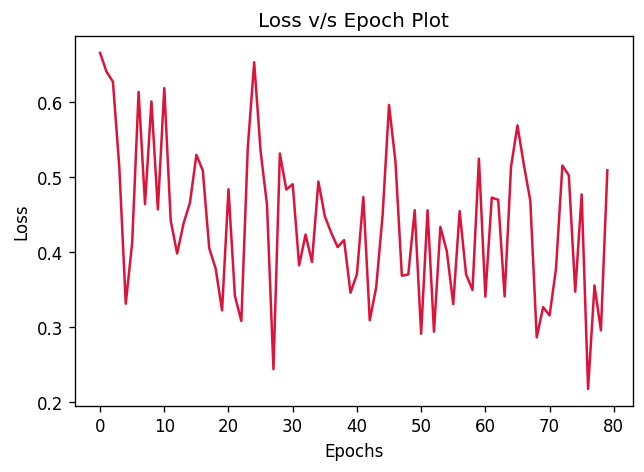

In [598]:
# Loss plot
plt.figure(figsize=(6,4), dpi=120)
sns.lineplot(total_loss, color="#DC143C")
plt.title("Loss v/s Epoch Plot")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

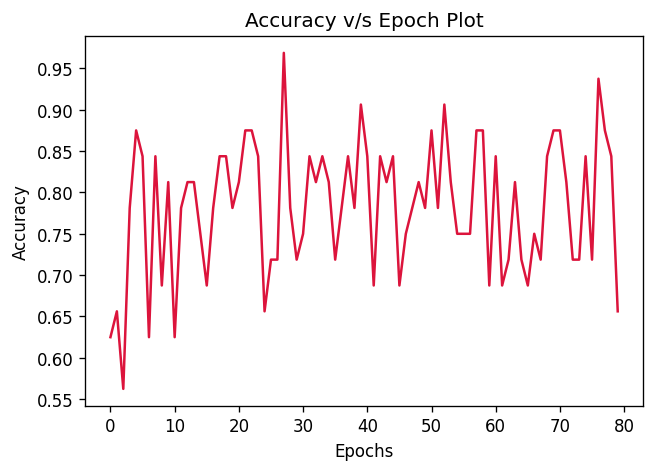

In [599]:
# Accuracy plot
plt.figure(figsize=(6,4), dpi=120)
sns.lineplot(total_accuracy, color="#DC143C")
plt.title("Accuracy v/s Epoch Plot")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

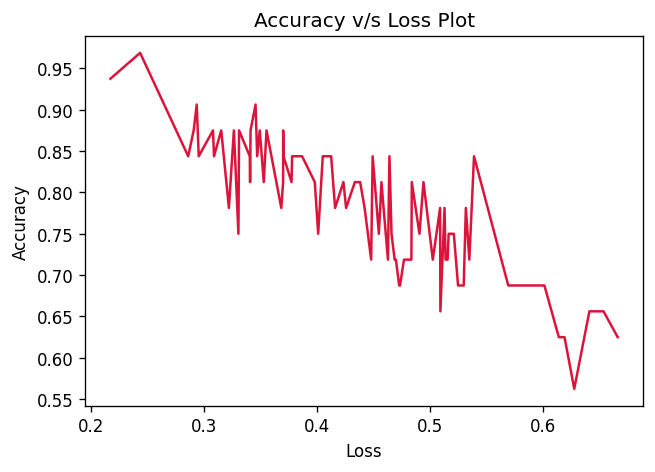

In [600]:
# Accuracy v/s Loss plot
plt.figure(figsize=(6,4), dpi=120)
sns.lineplot(x = total_loss, y = total_accuracy, color="#DC143C")
plt.title("Accuracy v/s Loss Plot")
plt.xlabel("Loss")
plt.ylabel("Accuracy")

In [601]:
# Save the trained model
torch.save(model, "diabestes_classification_model.pt")

In [602]:
# Load the model
classification_model = torch.load("diabestes_classification_model.pt")

In [612]:
# New data
new_data = torch.tensor([63, 123, 36, 83, 123, 22.21, 63])

In [613]:
# Perform forward propagation for prediction
with torch.no_grad():
    # Put the model in evaluation mode
    classification_model.eval()  
    output = classification_model(new_data)
    if output > 0.5:
        prediction = f"Positive [{round(output.item(),2)}]"
    else:
        prediction = f"Negative [{round(output.item(),2)}]"  

print("Predictions:", prediction)

Predictions: Positive [0.86]
